In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score



In [2]:
files = glob.glob('*.csv')
dfs = []
for file in files:
    if file != 'extraterrestrial data.csv':
        df = pd.read_csv(file)
        dfs.append(df)
data=pd.concat(dfs)
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),[1] Wind Direction (°),[1] Wind Speed (m/s),BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)
0,Year 1 Jan 01 01:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,40.0,2.5,19.055440
1,Year 1 Jan 01 02:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,38.0,2.5,18.783099
2,Year 1 Jan 01 03:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,38.0,2.5,18.391790
3,Year 1 Jan 01 04:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,42.0,2.6,18.021314
4,Year 1 Jan 01 05:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,46.0,2.8,17.675530
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,Year 1 Dec 31 20:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,68.0,0.2,22.702643
8756,Year 1 Dec 31 21:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,66.0,0.2,21.824334
8757,Year 1 Dec 31 22:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,64.0,0.3,21.068009
8758,Year 1 Dec 31 23:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,66.0,0.3,20.407125


In [3]:
data.columns


Index(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Dew Point Temperature (C)',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Direction (°)', '[1] Wind Speed (m/s)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)'],
      dtype='object')

In [4]:
data.describe()

,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),[1] Wind Direction (°),[1] Wind Speed (m/s),BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)
count,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210216.000000,210219.000000
mean,23.393333,79.566667,135.000000,16.430544,94.286886,173.602675,25.744094,62.831031,3.458056,206.549416,1.473155,30.168432
std,0.063421,6.317416,100.623298,8.527406,115.625916,249.868796,7.119398,25.546457,4.275378,100.552894,1.042656,8.858089
min,23.310000,69.790000,0.000000,-40.300000,0.000000,0.000000,2.200000,1.000000,0.000000,0.000000,0.000000,5.188952
25%,23.310000,74.100000,67.500000,10.500000,0.000000,0.000000,21.700000,41.000000,0.000000,118.000000,0.700000,24.813117
50%,23.415000,79.965000,135.000000,18.700000,8.000000,3.000000,26.300000,66.000000,0.200000,239.000000,1.200000,29.439182
75%,23.440000,86.070000,202.500000,23.500000,200.000000,359.000000,30.100000,86.000000,9.000000,284.000000,2.000000,35.282591
max,23.470000,87.510000,270.000000,31.700000,463.000000,850.000000,47.400000,100.000000,10.000000,360.000000,7.300000,63.572849


In [5]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")

In [6]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd

# Assuming you have the DataFrame 'data' with the given columns
# Set observer's latitude and longitude
lstm = 15 * 5.5  # Local Standard Time Meridian for India

# Calculate the day of the year from the 'Date/Time' column
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['day'] = data['Date/Time'].dt.dayofyear

# Calculate Equation of Time (EoT)
B = 360 / 365 * (data['day'] - 81)
eot = 9.87 * np.sin(2 * np.radians(B)) - 7.53 * np.cos(np.radians(B)) - 1.5 * np.sin(np.radians(B))

# Calculate Time Correction (TC)
tc = 4 * (data['Longs'] - lstm) + eot

# Convert 'Date/Time' to local time (Local Standard Time, LST)
data['Local Time'] = data['Date/Time'] + pd.to_timedelta(tc, unit='m')

# Calculate Hour Angle (HRA)
data['hra'] = 15 * (data['Local Time'].dt.hour + data['Local Time'].dt.minute / 60 - 12)




In [8]:
def solar_altitude_angle(LAT, delta, H):

    # Convert degrees to radians
    LAT_rad = np.radians(LAT)
    delta_rad = np.radians(delta)
    H_rad = np.radians(H)
    
    # Calculate solar elevation angle
    beta_rad = np.arcsin(np.sin(LAT_rad) * np.sin(delta_rad) + np.cos(LAT_rad) * np.cos(delta_rad) * np.cos(H_rad))
    beta_deg = np.degrees(beta_rad)
    
    return beta_deg
# Calculate declination
day_angle = 360 * (284 + data['day']) / 365
data['declination'] = 23.45 * np.sin(np.radians(day_angle))

# Assuming your DataFrame is named 'data'
# Extract required columns
LAT = data['Lats']
delta = data['declination']
H = data['hra']

# Calculate solar elevation angle
data['Solar Altitde Angle'] = solar_altitude_angle(LAT, delta, H)
latitude = data['Lats']

# Assuming data['hra'] represents hour angle
hour_angle = data['hra']

# Calculate solar zenith angle
data['solar_zenith'] = 90 - data['Solar Altitde Angle']

In [9]:


# Define a function to calculate solar azimuth angle for a single row
def calculate_single_solar_azimuth(local_hour, declination, latitude, hra):
    if local_hour < 12:
        return np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))
    else:
        return 360 - np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))

# Vectorized calculation of solar azimuth angle
data['solar_azimuth'] = np.where(data['Local Time'].dt.hour < 12,
                                  np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))),
                                  360 - np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))))


In [10]:
data['Wall Azimuth'] = data['Orientation'].replace({0: 180, 180: 0, 90: 270, 270: 90})

data['AOI'] = np.degrees(np.arccos(np.sin(np.radians(data['solar_zenith'])) * np.cos(np.radians(data['solar_azimuth']-data['Wall Azimuth']))))


In [11]:
def calculate_IRH(Tdb_C, Tdp_C):
    # Convert temperatures to Kelvin
    Tdb_K = Tdb_C + 273.15  # Drybulb temperature in Kelvin
    Tdp_K = Tdp_C + 273.15  # Dewpoint temperature in Kelvin
    
    # Calculate sky emissivity (ϵsky) using the correlation from Clark & Allen (1978)
    ϵsky_clear = 0.787 + 0.764 * np.log(Tdp_K / 273)
    
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate the rate of infrared radiation emitted from the sky (IRH)
    IRH = ϵsky_clear * sigma * Tdb_K**4
    return IRH

# Example usage:
Tdb_data_C = data['[1] Dry Bulb Temperature (C)']  # Drybulb temperature in Celsius
Tdp_data_C = data['[1] Dew Point Temperature (C)']  # Dewpoint temperature in Celsius

IRH_data = calculate_IRH(Tdb_data_C, Tdp_data_C)
def calculate_Tsky(IRH):
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate sky temperature (Tsky) using the formula
    Tsky = (IRH / sigma)**0.25 - 273.15
    return Tsky

# Example usage:
 # Rate of infrared radiation emitted from the sky in W/m^2

Tsky_data = calculate_Tsky(IRH_data)
data['Tsky'] = Tsky_data

In [12]:
Y = np.maximum(0.45, 0.55 + 0.437 * np.cos(np.radians(data['AOI'])) + 0.313 * np.cos(np.radians(data['AOI']))**2)

In [13]:
data['DNR on wall']=data['[1] Direct Normal Radiation (Wh/m2)']*np.cos(np.radians(data['AOI']))
data['Diffuse_on_wall']=data['[1] Diffuse Horizontal Radiation (Wh/m2)']*Y
data['E_ground']=(data['[1] Direct Normal Radiation (Wh/m2)']*np.sin(np.radians(data['Solar Altitde Angle']))+data['[1] Diffuse Horizontal Radiation (Wh/m2)'])*0.2*(1+np.cos(np.radians(data['Solar Altitde Angle'])))/2

In [14]:
data['H']=12.49+4.065*data['[1] Wind Speed (m/s)']+0.028*data['[1] Wind Speed (m/s)']**2

In [15]:
data['E/H']=(data['DNR on wall']+data['Diffuse_on_wall']+data['E_ground'])/data['H']
data['t_longwave']=(data['[1] Dry Bulb Temperature (C)']-data['Tsky'])/data['H']
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),...,solar_azimuth,Wall Azimuth,AOI,Tsky,DNR on wall,Diffuse_on_wall,E_ground,H,E/H,t_longwave
0,2002-01-01 01:00:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,...,89.546635,180.0,90.009784,4.441786,-0.0,0.0,0.0,22.82750,0.0,0.681556
1,2002-01-01 02:00:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,...,90.380729,180.0,89.901907,3.826451,0.0,0.0,0.0,22.82750,0.0,0.682228
2,2002-01-01 03:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,...,92.589853,180.0,88.758166,3.258699,0.0,0.0,0.0,22.82750,0.0,0.685196
3,2002-01-01 04:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,...,96.032023,180.0,85.943742,2.880121,0.0,0.0,0.0,23.24828,0.0,0.671872
4,2002-01-01 05:00:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,...,100.501287,180.0,81.327899,2.241541,0.0,0.0,0.0,24.09152,0.0,0.658259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2002-12-31 20:00:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,...,261.044129,270.0,39.746294,7.712980,0.0,0.0,0.0,13.30412,0.0,0.953616
8756,2002-12-31 21:00:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,...,265.165849,270.0,52.612105,6.742386,0.0,0.0,0.0,13.30412,0.0,0.958922
8757,2002-12-31 22:00:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,...,268.186131,270.0,66.152536,5.985289,0.0,0.0,0.0,13.71202,0.0,0.934560
8758,2002-12-31 23:00:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,...,269.919651,270.0,79.890262,5.485339,0.0,0.0,0.0,13.71202,0.0,0.934557


In [16]:
data['Hour'] = data['Date/Time'].dt.hour
data['Windward'] = np.where(data['[1] Wind Direction (°)'] - data['Orientation'] >= 0, 1, 0.5)


In [17]:
data.columns

Index(['Date/Time', 'Lats', 'Longs', 'Orientation',
       '[1] Dew Point Temperature (C)',
       '[1] Diffuse Horizontal Radiation (Wh/m2)',
       '[1] Direct Normal Radiation (Wh/m2)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', '[1] Total Sky Cover (tenths)',
       '[1] Wind Direction (°)', '[1] Wind Speed (m/s)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)',
       'day', 'Local Time', 'hra', 'declination', 'Solar Altitde Angle',
       'solar_zenith', 'solar_azimuth', 'Wall Azimuth', 'AOI', 'Tsky',
       'DNR on wall', 'Diffuse_on_wall', 'E_ground', 'H', 'E/H', 't_longwave',
       'Hour', 'Windward'],
      dtype='object')

In [18]:
# import matplotlib.pyplot as plt

# # Assuming your dataset is stored in a variable called 'data'

# # Extracting the required columns
# surface_temp = data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']
# wind_speed = data['[1] Wind Speed (m/s)']

# # Plotting the histogram
# plt.hist2d(wind_speed, surface_temp, bins=(20, 20), cmap='viridis')
# plt.colorbar(label='Counts')
# plt.xlabel('[1] Wind Speed (m/s)')
# plt.ylabel('Surface Outside Face Temperature [C](Hourly)')
# plt.title('Histogram: Wind Speed vs Surface Outside Face Temperature')
# plt.show()


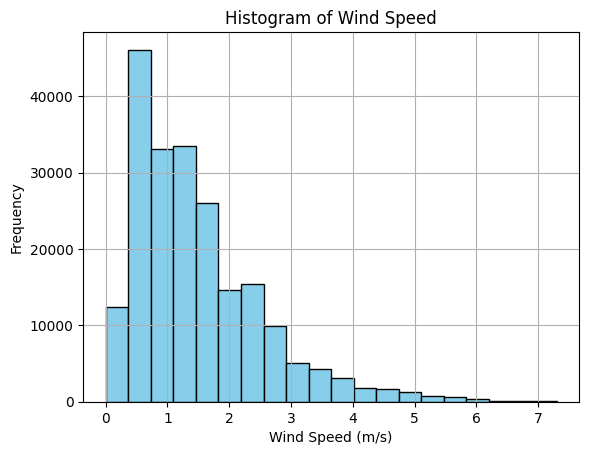

In [19]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'data'

# Extracting the wind speed data
wind_speed = data['[1] Wind Speed (m/s)']

# Plotting the histogram
plt.hist(wind_speed, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed')
plt.grid(True)
plt.show()


In [20]:
# data['ws_sq']=np.log(data['[1] Wind Speed (m/s)'])

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming your dataset is stored in a variable called 'data'

# # Assuming you've already created the 'ws_sq' column
# data['ws_sq'] = np.log(data['[1] Wind Speed (m/s)'])

# # Filtering out non-positive values
# wind_speed_sq = data[data['ws_sq'] > 0]['ws_sq']

# # Plotting the histogram
# plt.hist(wind_speed_sq, bins=20, color='skyblue', edgecolor='black')
# plt.xlabel('Log Wind Speed (m/s)')
# plt.ylabel('Frequency')
# plt.title('Histogram of Log Wind Speed')
# plt.grid(True)
# plt.show()


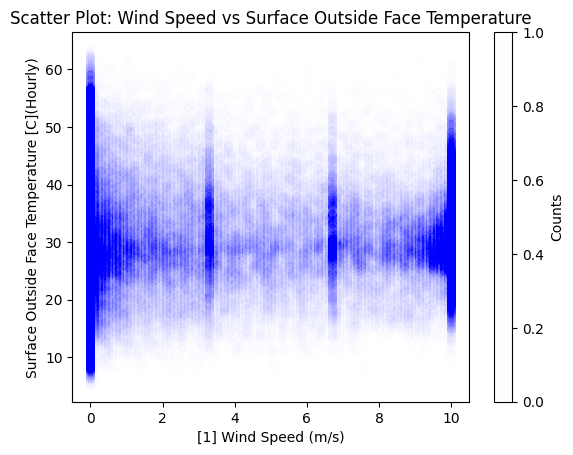

In [22]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'data'

# Extracting the required columns
surface_temp = data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']
wind_speed = data['[1] Total Sky Cover (tenths)']

# Plotting the scatter plot
plt.scatter(wind_speed, surface_temp, c='blue', alpha=0.005)
plt.colorbar(label='Counts')
plt.xlabel('[1] Wind Speed (m/s)')
plt.ylabel('Surface Outside Face Temperature [C](Hourly)')
plt.title('Scatter Plot: Wind Speed vs Surface Outside Face Temperature')
plt.show()


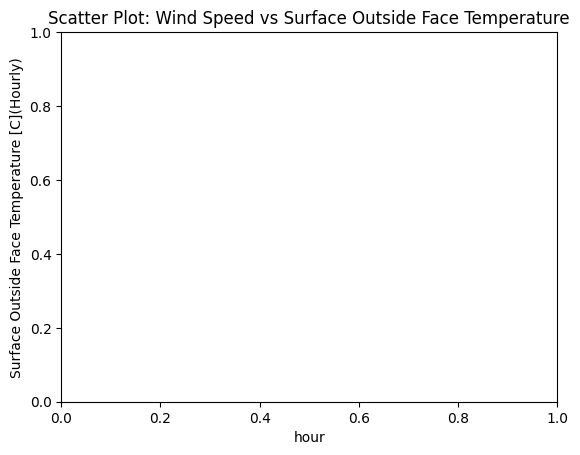

In [23]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'data'

# Extracting the required columns
surface_temp = data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']
wind_speed = data['Hour']
plt.xlabel('hour')
plt.ylabel('Surface Outside Face Temperature [C](Hourly)')
plt.title('Scatter Plot: Wind Speed vs Surface Outside Face Temperature')
plt.show()


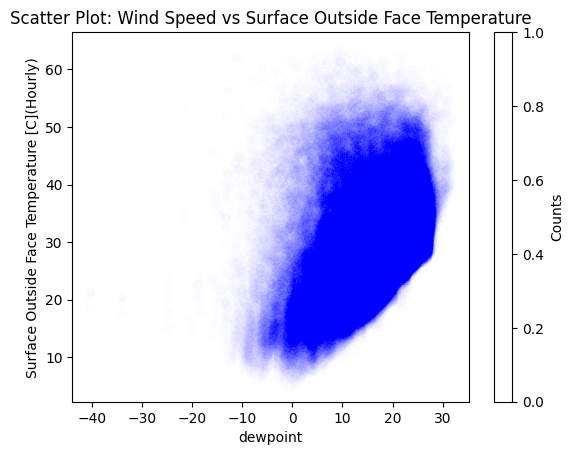

In [24]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'data'

# Extracting the required columns
surface_temp = data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']
wind_speed = data['[1] Dew Point Temperature (C)']

# Plotting the scatter plot
plt.scatter(wind_speed, surface_temp, c='blue', alpha=0.002)
plt.colorbar(label='Counts')
plt.xlabel('dewpoint')
plt.ylabel('Surface Outside Face Temperature [C](Hourly)')
plt.title('Scatter Plot: Wind Speed vs Surface Outside Face Temperature')
plt.show()


In [25]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable called 'data'

# Extracting the required columns
surface_temp = data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']
wind_speed = data['sky_Cover*DNR']

# Plotting the scatter plot
plt.scatter(wind_speed, surface_temp, c='blue', alpha=0.002)
plt.colorbar(label='Counts')
plt.xlabel('sky_cover_dnr')
plt.ylabel('Surface Outside Face Temperature [C](Hourly)')
plt.title('Scatter Plot: Wind Speed vs Surface Outside Face Temperature')
plt.show()


KeyError: 'sky_Cover*DNR'

In [26]:
data

,Date/Time,Lats,Longs,Orientation,[1] Dew Point Temperature (C),[1] Diffuse Horizontal Radiation (Wh/m2),[1] Direct Normal Radiation (Wh/m2),[1] Dry Bulb Temperature (C),[1] Relative Humidity (),[1] Total Sky Cover (tenths),...,AOI,Tsky,DNR on wall,Diffuse_on_wall,E_ground,H,E/H,t_longwave,Hour,Windward
0,2002-01-01 01:00:00,23.47,69.79,0.0,6.0,0.0,0.0,20.0,40.0,0.0,...,90.009784,4.441786,-0.0,0.0,0.0,22.82750,0.0,0.681556,1.0,1.0
1,2002-01-01 02:00:00,23.47,69.79,0.0,5.8,0.0,0.0,19.4,41.0,0.0,...,89.901907,3.826451,0.0,0.0,0.0,22.82750,0.0,0.682228,2.0,1.0
2,2002-01-01 03:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.9,41.0,0.0,...,88.758166,3.258699,0.0,0.0,0.0,22.82750,0.0,0.685196,3.0,1.0
3,2002-01-01 04:00:00,23.47,69.79,0.0,5.4,0.0,0.0,18.5,42.0,0.0,...,85.943742,2.880121,0.0,0.0,0.0,23.24828,0.0,0.671872,4.0,1.0
4,2002-01-01 05:00:00,23.47,69.79,0.0,4.3,0.0,0.0,18.1,40.0,0.0,...,81.327899,2.241541,0.0,0.0,0.0,24.09152,0.0,0.658259,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2002-12-31 20:00:00,23.39,87.51,90.0,18.7,0.0,0.0,20.4,90.0,0.5,...,39.746294,7.712980,0.0,0.0,0.0,13.30412,0.0,0.953616,20.0,0.5
8756,2002-12-31 21:00:00,23.39,87.51,90.0,18.2,0.0,0.0,19.5,92.0,0.2,...,52.612105,6.742386,0.0,0.0,0.0,13.30412,0.0,0.958922,21.0,0.5
8757,2002-12-31 22:00:00,23.39,87.51,90.0,17.8,0.0,0.0,18.8,94.0,0.0,...,66.152536,5.985289,0.0,0.0,0.0,13.71202,0.0,0.934560,22.0,0.5
8758,2002-12-31 23:00:00,23.39,87.51,90.0,17.7,0.0,0.0,18.3,96.0,0.1,...,79.890262,5.485339,0.0,0.0,0.0,13.71202,0.0,0.934557,23.0,0.5


In [27]:
# data['e^dewpoint'] = 0.000001*np.exp(data['[1] Dew Point Temperature (C)'])


In [28]:
data=data.dropna()

In [29]:
# Convert 'Date/Time' column to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Extract month and day from the 'Date/Time' column and combine them into a single column 'Date_Month'
data['Date_Month'] = data['Date/Time'].dt.strftime('%m-%d')

# Group the data by the combined effect of date and month and find the maximum and minimum temperature for each group
max_temp_per_date_month = data.groupby('Date_Month')['[1] Dry Bulb Temperature (C)'].max().reset_index()
min_temp_per_date_month = data.groupby('Date_Month')['[1] Dry Bulb Temperature (C)'].min().reset_index()

# Merge the maximum and minimum temperatures back to the original DataFrame based on the Date_Month column
data = data.merge(max_temp_per_date_month, on='Date_Month', suffixes=('', '_max'))
data = data.merge(min_temp_per_date_month, on='Date_Month', suffixes=('', '_min'))

# Optionally, you can drop the intermediate 'Date_Month' column if you don't need it anymore
data = data.drop('Date_Month', axis=1)

C:\Users\Amresh Gupta\AppData\Local\Temp\ipykernel_32744\1996603056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date/Time'] = pd.to_datetime(data['Date/Time'])
C:\Users\Amresh Gupta\AppData\Local\Temp\ipykernel_32744\1996603056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_Month'] = data['Date/Time'].dt.strftime('%m-%d')


In [30]:
data['sin_hour']=data['[1] Dry Bulb Temperature (C)']*(np.sin(2 * (np.pi / 24) * data['Hour'] -28*np.pi/24))
data['sin_hour1']=data['E/H']*(np.sin(2 * (np.pi / 24) * data['Hour'] -28*np.pi/24))

In [31]:
data['cos_hour']=data['[1] Dry Bulb Temperature (C)']*(np.cos(2 * (np.pi / 24) * data['Hour'] -28*np.pi/24))
data['cos_hour1']=data['E/H']*(np.cos(2 * (np.pi / 24) * data['Hour'] -28*np.pi/24))

In [78]:
data['sky_Cover*DNR']=data[ 'DNR on wall']*(data['[1] Total Sky Cover (tenths)'])
data['sky_Cover*E_ground']=data[ 'E_ground']*(data['[1] Total Sky Cover (tenths)']+0.001)
data['windspeed*windward']=data['[1] Wind Speed (m/s)']*data['Windward']
data['windspeed*E/H']=data['[1] Wind Speed (m/s)']*data['E/H']
data['windspeed*RH']=data['[1] Wind Speed (m/s)']*data['[1] Relative Humidity ()']

In [79]:

X = data.drop(['Date/Time',   'Orientation',
       '[1] Diffuse Horizontal Radiation (Wh/m2)','Lats', 'Longs',
       '[1] Direct Normal Radiation (Wh/m2)','t_longwave','[1] Wind Speed (m/s)',
       '[1] Wind Direction (°)','[1] Total Sky Cover (tenths)',
       'BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)',
       'day', 'Local Time', 'hra', 'declination', 'Solar Altitde Angle','[1] Dry Bulb Temperature (C)_max',
       '[1] Dry Bulb Temperature (C)_min',
       'solar_zenith', 'solar_azimuth', 'Wall Azimuth', 'AOI', 'Tsky','H',
       'Hour'], axis = 1)
Y =  data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)']

X.columns

Index(['[1] Dew Point Temperature (C)', '[1] Dry Bulb Temperature (C)',
       '[1] Relative Humidity ()', 'DNR on wall', 'Diffuse_on_wall',
       'E_ground', 'E/H', 'Windward', 'sin_hour', 'sin_hour1', 'cos_hour',
       'cos_hour1', 'sky_Cover*DNR', 'windspeed*windward', 'windspeed*E/H',
       'sky_Cover*E_ground', 'windspeed*RH'],
      dtype='object')

In [80]:
feature_names = X.columns.tolist()

In [81]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

poly = PolynomialFeatures(degree=1,include_bias=True)
X_trans=poly.fit_transform(X)


In [82]:
# feature_names = X_trans.columns.tolist()

In [83]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, test_size = 0.2, random_state = 0)

In [84]:
feature_names = poly.get_feature_names_out()

# Create DataFrame for transformed data
X_trans_df = pd.DataFrame(X_trans, columns=feature_names)
X_trans_df1=X_trans_df[0:170000]
Y1=Y[0:170000]
X_trans_df2=X_trans_df[170000:]
Y2=Y[170000:]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans_df1, Y1, test_size = 0.2, random_state = 0)

In [86]:
X_train.shape

(136000, 18)

In [87]:
reg = LinearRegression().fit(X_train, y_train)

In [88]:
reg.score(X_train, y_train)

0.9030857958186501

In [89]:
y_pred = reg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
r2

0.9030800782170618

In [90]:
y_pred2 = reg.predict(X_trans_df2)

# Calculate the R-squared score
r2 = r2_score(y_pred2,Y2)
r2

0.8543368219239823

In [91]:
import pandas as pd

# Assuming y_pred2 and Y2 are numpy arrays or lists
# Convert them to pandas Series for easier manipulation
y_pred2_series = pd.Series(y_pred2, name='Predicted Values')
Y2_series = pd.Series(Y2, name='Actual Values')

# Create a DataFrame to hold the data
df = pd.concat([y_pred2_series, Y2_series], axis=1)

# Add index as a column for reference
df.reset_index(inplace=True)

# Display the DataFrame
df

,index,Predicted Values,Actual Values
0,0,26.168342,NaN
1,1,28.876913,NaN
2,2,32.500556,NaN
3,3,35.682570,NaN
4,4,38.453816,NaN
...,...,...,...
80427,210211,NaN,23.808952
80428,210212,NaN,22.702643
80429,210213,NaN,21.824334
80430,210214,NaN,21.068009


In [92]:
coefficients = reg.coef_
for coef, feature in zip(coefficients, feature_names):
    print(f"Coefficient for {feature}: {coef}")

Coefficient for 1: 0.0
Coefficient for [1] Dew Point Temperature (C): 0.09199961514900314
Coefficient for [1] Dry Bulb Temperature (C): 0.834170690246245
Coefficient for [1] Relative Humidity (): -0.03050064420440066
Coefficient for DNR on wall: 0.013964504437114653
Coefficient for Diffuse_on_wall: 0.06129835283891618
Coefficient for E_ground: 0.06676376153819374
Coefficient for E/H: -0.4589708589843126
Coefficient for Windward: -0.48606834379148584
Coefficient for sin_hour: 0.032873326302930335
Coefficient for sin_hour1: 0.059389142504802796
Coefficient for cos_hour: -0.029356363032543454
Coefficient for cos_hour1: -0.017943119543019855
Coefficient for sky_Cover*DNR: -0.0004194500966252418
Coefficient for windspeed*windward: -0.822659682254573
Coefficient for windspeed*E/H: -0.14679147887847735
Coefficient for sky_Cover*E_ground: -0.0006298892089159387
Coefficient for windspeed*RH: 0.0032340244530713073


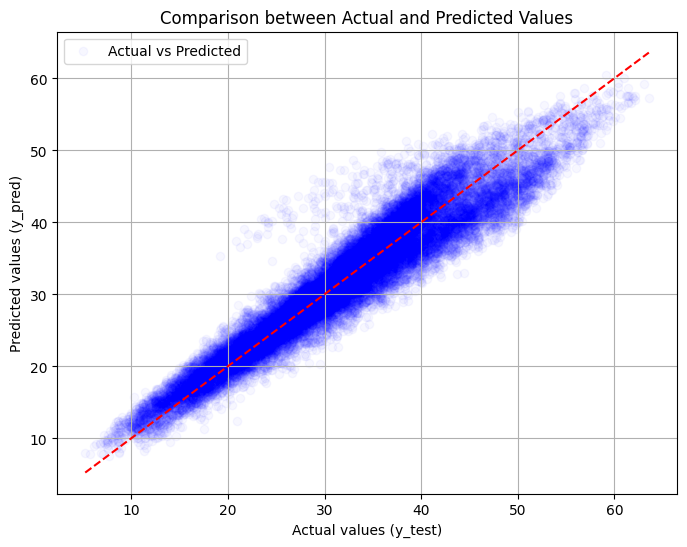

In [95]:
import matplotlib.pyplot as plt

# Plotting the comparison graph
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted',alpha=0.03)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Comparison between Actual and Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [201]:
# import matplotlib.pyplot as plt

# # Assuming you have obtained coefficients and feature_names
# coefficients = reg.coef_

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(feature_names)), coefficients)
# plt.yticks(range(len(feature_names)), feature_names)
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.show()


In [117]:
data['T-sol']=data['[1] Dry Bulb Temperature (C)']+0.7*data['E/H']


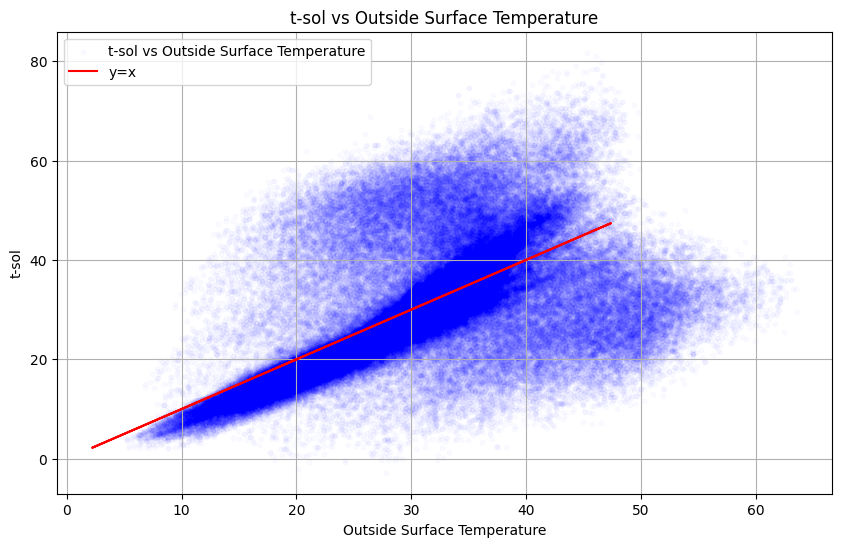

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['BLOCK1:ZONE1_WALL_3_0_0:Surface Outside Face Temperature [C](Hourly)'], data['T-sol'], color='blue', label='t-sol vs Outside Surface Temperature', alpha=0.02, s=10)  # Adjust the size of markers by changing the value of s
plt.plot(data['[1] Dry Bulb Temperature (C)'], data['[1] Dry Bulb Temperature (C)'], color='red', label='y=x')  # Add the line
plt.title('t-sol vs Outside Surface Temperature')
plt.xlabel('Outside Surface Temperature')
plt.ylabel('t-sol')
plt.legend()
plt.grid(True)
plt.show()


In [318]:

data_ah_90=data.loc[data['Orientation']==90]
data_ah_90_summer = data_ah_90[data_ah_90['Date/Time'].dt.month.isin([3, 4, 5])]

In [319]:
import matplotlib.pyplot as plt

# Assuming t_sol_subset and t_ex_subset are your actual and predicted values
plt.figure(figsize=(20, 8))  

# Subset the data for the specified index range

t_sol_subset = data_ah_90_summer['T_sol_air_f'] # Subset of T_sol_air
t_ex_subset = data_ah_90_summer['[1] Surface Outside Face Temperature  (C)'] # Subset of [1] Surface Outside Face Temperature  (C)

# Create a line plot for the subset of y_test and y_pred with respect to their index
plt.plot( t_sol_subset, label='T-sol')
plt.plot(t_ex_subset, label='Tex')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.title('Comparison ')

# Add legend
plt.legend()

# Show the plot
plt.show()


KeyError: 'T_sol_air_f'

<Figure size 2000x800 with 0 Axes>